# Дилемма «Смещение–разброс»

Пусть

$$
Y = f^*(x) + \varepsilon (x),
\qquad
{\rm E}\, \varepsilon (x) = 0,
\qquad
{\rm Var}\, \varepsilon (x) = \sigma_{\varepsilon}^2 (x)
$$

$f(x, D)$ – решающее правило, $D = \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \dots, (x^{(N)},y^{(N)})\}$ – обучающая выборка

$x$, $f^*(x)$ случайными не являются

Случайными являются: $\varepsilon (x)$ и $D$, причем считаем их независимыми


Тогда
$$
{\rm MSE}(x) = {\rm E}_{D,\varepsilon} \bigl(f(x,D) - Y\bigr)^2 
= 
\sigma^2_{\varepsilon} (x)
+ \underbrace{{\rm E}_D^2 \bigl(f(x, D) - f^*(x)\bigr)}_{{\rm Bias}^2 x}
+ \underbrace{{\rm E}_D \bigl(f(x, D) - {\rm E}_D f(x, D)\bigr)^2}_{{\rm Variance}\,x}
$$

Ошибка $=$ Неустранимая ошибка $+$ Смещение${}^2$ $+$ Разброс


_Доказательство:_
$$
{\rm E}_{D,\varepsilon} \bigl(f(x,D) - Y\bigr)^2 
= 
\color{blue}{{\rm E}_D f^2(x,D)}
- \color{red}{2{\rm E}_{D,\varepsilon} \Bigl( f(x,D) \bigl(f^*(x) + \varepsilon (x)\bigr)\Bigr)}
+ \color{magenta}{{\rm E}_{\varepsilon} \bigr(f^*(x) + \varepsilon (x)\bigl)^2}
=
$$
$$
=
\color{blue}{{\rm E}_D \bigl(f(x, D) - {\rm E}_D f(x, D)\bigr)^2 + \bigl({\rm E}_D f(x,D)\bigr)^2 }
- \color{red}{2 f^*(x){\rm E}_D f(x,D) +  2{\rm E}_{D,\varepsilon} \bigl(f(x,D)\varepsilon (x)\bigr)}
+ \color{magenta}{\bigr(f^*(x)\bigl)^2 + 2f^*(x) {\rm E}\varepsilon(x) + {\rm E}\varepsilon^2(x)}
= 
$$
$$
=
{\rm E}_D \bigl(f(x, D) - {\rm E}_D f(x, D)\bigr)^2
+ \Bigl({\rm E}_D \bigl(f(x, D) - f^*(x)\bigr)\Bigr)^2
+ \sigma^2_{\varepsilon} (x)
$$


(На самом деле, проще раскрыть л.ч и п.ч. и увидеть, что они совпадают.)

Большое смещение - недообучение

Большой разброс - переобучение

Большой разброс: kNN, Decision Trees
    
Небольшой разброс: LDA, Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Эксперимент 1

In [2]:
def f_star(x):
    x = x.ravel()
    return x**2 + 2*x

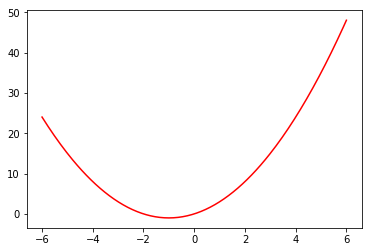

In [3]:
x_plot = np.linspace(-6, 6, 200).reshape(200, 1)
plt.plot(x_plot, f_star(x_plot), 'r')

In [4]:
sigma = 5
def generate(N, sigma = sigma):
    x = np.sort(12*np.random.rand(N) - 6)
    y = f_star(x) + sigma*np.random.randn(N)
    x = np.reshape(x, (N, 1))
    return x, y

In [5]:
N = 20
np.random.seed(0)
x_train, y_train = generate(N)

(-6, 6)

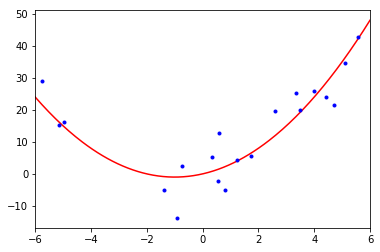

In [6]:
plt.plot(x_plot, f_star(x_plot), 'r')
plt.plot(x_train, y_train, '.b')
plt.xlim((-6, 6))

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [8]:
deg = 2
poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
poly_model.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

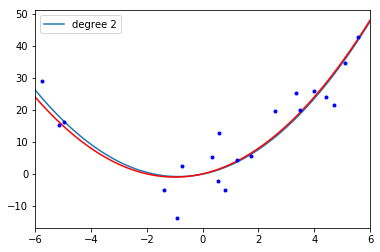

In [9]:
plt.plot(x_plot, poly_model.predict(x_plot), label = "degree %d" % deg)
plt.plot(x_plot, f_star(x_plot), 'r')
plt.plot(x_train, y_train, '.b')
plt.xlim((-6, 6))
plt.legend(loc = 'best')

In [10]:
from ipywidgets import *

def interact_poly_draw(deg = 3):
    poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    
    poly_model.fit(x_train, y_train)

    plt.plot(x_plot, poly_model.predict(x_plot), 'b')
    plt.plot(x_plot, f_star(x_plot), 'r')
    plt.plot(x_train, y_train, '.b')
    plt.xlim((-6, 6))
    plt.ylim((-10, 50))

interact(interact_poly_draw, deg = (1, 20));

A Jupyter Widget

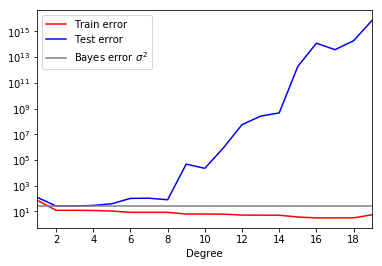

In [11]:
N_train = 20
N_test = 20
np.random.seed(1)
x_train, y_train = generate(N_train)
x_test,  y_test  = generate(N_test)

degs = range(1, N_train)

err_train = []
err_test = []

for deg in degs:
    poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    poly_model.fit(x_train, y_train)
    
    err_train.append(np.mean((poly_model.predict(x_train) - y_train)**2))
    err_test.append( np.mean((poly_model.predict(x_test)  - y_test)**2))

plt.semilogy(degs, err_train, 'r', label = 'Train error')
plt.semilogy(degs, err_test,  'b', label = 'Test error')
plt.axhline(sigma**2, color = 'gray', label = r'Bayes error $\sigma^2$')
plt.xlabel('Degree')
plt.xlim((1, N_train - 1))
plt.legend(loc = 2)

In [12]:
print(np.min(err_test), degs[np.argmin(err_test)])

26.5088916445 3


In [13]:
def poly_draw(deg = 3):
    poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    
    x, y = generate(N)
    poly_model.fit(x, y)

    plt.plot(x_plot, f_star(x_plot), 'r')
    plt.plot(x_plot, poly_model.predict(x_plot), 'b', alpha = .7)
    plt.xlim((-6, 6))
    plt.ylim((-10, 50))

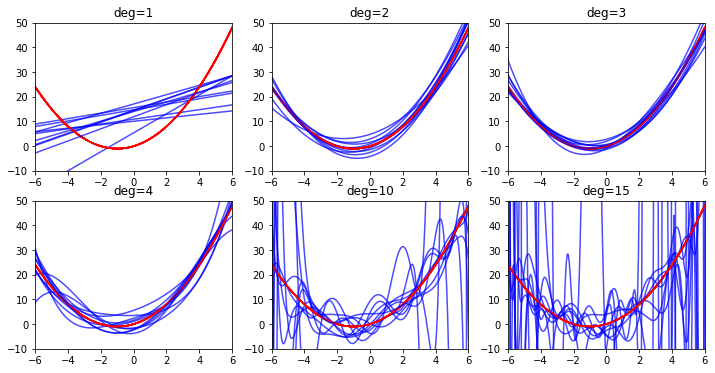

In [14]:
plt.figure(figsize = (12, 6))

plt.subplot(2, 3, 1)
plt.title('deg=1')
for i in range(10):
    poly_draw(deg = 1)

plt.subplot(2, 3, 2)
plt.title('deg=2')
for i in range(10):
    poly_draw(deg = 2)

plt.subplot(2, 3, 3)
plt.title('deg=3')
for i in range(10):
    poly_draw(deg = 3)

plt.subplot(2, 3, 4)
plt.title('deg=4')
for i in range(10):
    poly_draw(deg = 4)
    
plt.subplot(2, 3, 5)
plt.title('deg=10')
for i in range(10):
    poly_draw(deg = 10)

plt.subplot(2, 3, 6)
plt.title('deg=15')
for i in range(10):
    poly_draw(deg = 15)

In [15]:
def model_generate_predict(deg, x_vector):
    poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    
    x, y = generate(N)
    poly_model.fit(x, y)

    return poly_model.predict(x_vector)

In [16]:
x_vector = np.linspace(-6, 6, 200)
bias2 = []
variance = []
n_it = 100 # к-во итераций

for deg in degs:
    y_sum = np.zeros(x_vector.shape)
    y_sum_sqr = np.zeros(x_vector.shape)
    for it in range(n_it): 
        y = model_generate_predict(deg, x_vector.reshape(200, 1))
        y_sum = y_sum + y 
        y_sum_sqr = y_sum_sqr + y**2
    bias2.append(np.mean((y_sum/n_it - f_star(x_vector))**2))
    variance.append(np.mean(y_sum_sqr/n_it - y_sum**2/n_it**2)) 
    #bias2.append(((y_sum/n_it - f_star(x_vector))**2)[150])
    #variance.append((y_sum_sqr/n_it - y_sum**2/n_it**2)[150]) 
    
    
    

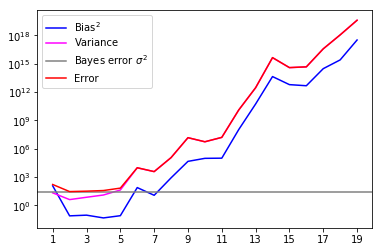

In [17]:
plt.semilogy(degs, bias2, color = 'blue', label = r'Bias${}^2$')
plt.semilogy(degs, variance, color = 'magenta', label = r'Variance')
plt.axhline(sigma**2, color = 'gray', label = r'Bayes error $\sigma^2$')
plt.semilogy(degs, np.array(bias2) + np.array(variance) + sigma**2, color = 'red', label = 'Error')
plt.xticks(np.arange(np.min(degs), np.max(degs)+1, step=2))
plt.legend(loc = 2)
pass